In [12]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn
import scipy.optimize as opt
import statsmodels.api as sm

%matplotlib inline

In [13]:
# Reading the dataset
dataset = pd.read_csv("./dataset/framingham.csv")
dataset.drop(["education"], inplace=True, axis=1)
dataset.rename(columns={"male": "sex_male"}, inplace=True)

dataset.dropna(axis=0, inplace=True)
print(dataset.head(), dataset.shape)
print(dataset.TenYearCHD.value_counts())

   sex_male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0         1   39              0         0.0     0.0                0   
1         0   46              0         0.0     0.0                0   
2         1   48              1        20.0     0.0                0   
3         0   61              1        30.0     0.0                0   
4         0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           

C:\Users\Kevin Nguyen\AppData\Local\Temp\ipykernel_18744\2655604035.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(x="TenYearCHD", data=dataset, palette="BuGn_r")


<Axes: xlabel='TenYearCHD', ylabel='count'>

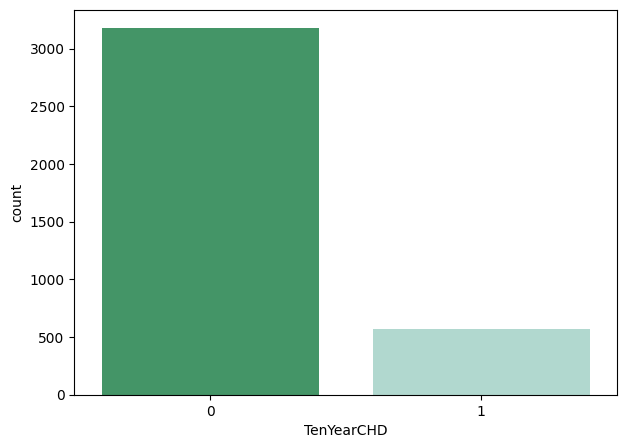

In [14]:
# counting no. of patients affected with CHD
plt.figure(figsize=(7,5))
sn.countplot(x="TenYearCHD", data=dataset, palette="BuGn_r")

In [16]:
# Splitting the dataset into the Training set and Test set
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2625, 14) (2625,)
Test set: (1126, 14) (1126,)


In [17]:
# Training the logistic regression on the Training set
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [18]:
# Evaluation and accuracy
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[944   7]
 [159  16]]


0.8525754884547069